# Heart Disease Pridiction

Importing Dependancies

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing Heart Dataset
heart_data = pd.read_csv('D:/122B1F034/FODS_FA_Dataset/heart.csv')

# Data Preprocessing and Transformation

In [4]:
#printing first 5 rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#printing last 5 rows
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in dataset
heart_data.shape

(303, 14)

In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [38]:
#checking  the missing values present
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
# Statistical information of data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate quartiles and IQR
quartiles = heart_data[numerical_columns].quantile([0.25, 0.5, 0.75])
IQR = quartiles.loc[0.75] - quartiles.loc[0.25]

# Print the quartiles and IQR
print("Quartiles:\n", quartiles)
print("\nInterquartile Range (IQR):\n", IQR)

# Step 2: Identify Outliers Based on IQR
lower_bound = quartiles.loc[0.25] - 1.5 * IQR
upper_bound = quartiles.loc[0.75] + 1.5 * IQR

# Checking outliers in the numerical columns
outliers = (heart_data[numerical_columns] < lower_bound) | (heart_data[numerical_columns] > upper_bound)
print("\nOutliers based on IQR:\n", outliers.sum())

Quartiles:
        age  trestbps   chol  thalach  oldpeak
0.25  47.5     120.0  211.0    133.5      0.0
0.50  55.0     130.0  240.0    153.0      0.8
0.75  61.0     140.0  274.5    166.0      1.6

Interquartile Range (IQR):
 age         13.5
trestbps    20.0
chol        63.5
thalach     32.5
oldpeak      1.6
dtype: float64

Outliers based on IQR:
 age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


C:\Users\RUSHIKESH HIRAY\AppData\Local\Temp\ipykernel_11212\2741377953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=heart_data['age'], palette='viridis', legend=False)


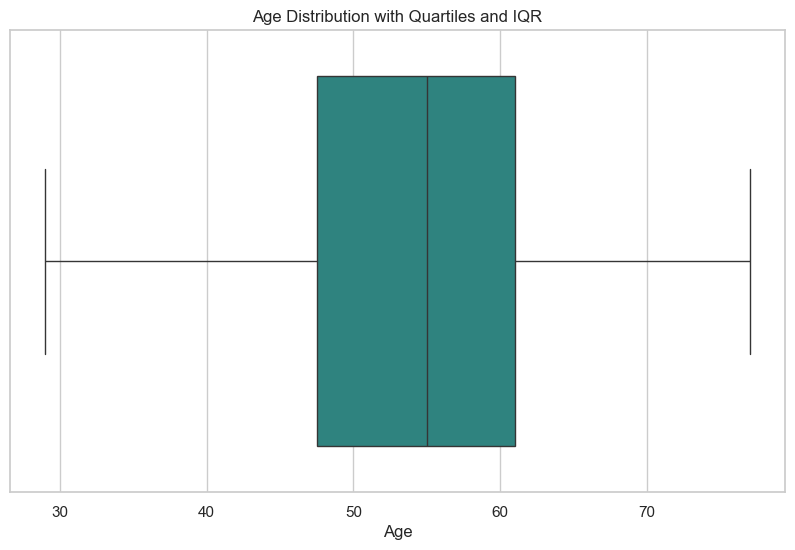

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_data['age'], palette='viridis', legend=False)
plt.title('Age Distribution with Quartiles and IQR')
plt.xlabel('Age')
plt.show()

# Data Visualization

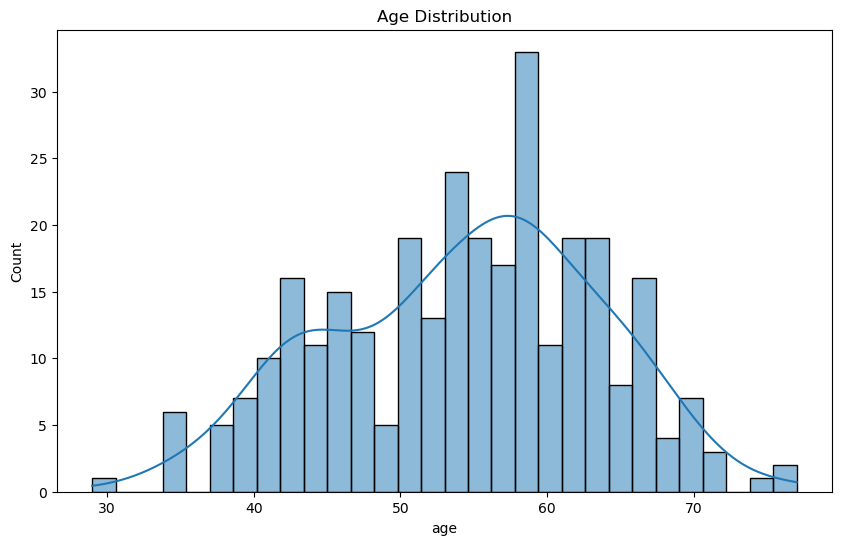

In [21]:
# Cheaking Age distribution in dataset
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

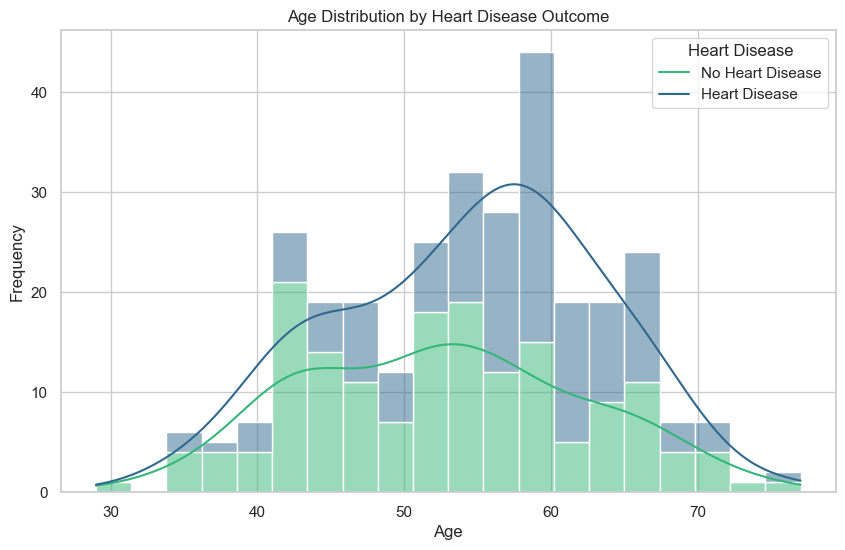

In [25]:
# Set the plot style
sns.set(style="whitegrid")

# Plot histogram for Age with Heart Disease as hue
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_data, x="age", hue="target", bins=20, kde=True, multiple="stack", palette="viridis")
plt.title('Age Distribution by Heart Disease Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

Heart disease increases with age, peaking around 55-60 years. 
Younger individuals (below 40) have a much lower frequency of heart disease compared to older individuals.



In [37]:
correlation_matrix = heart_data.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

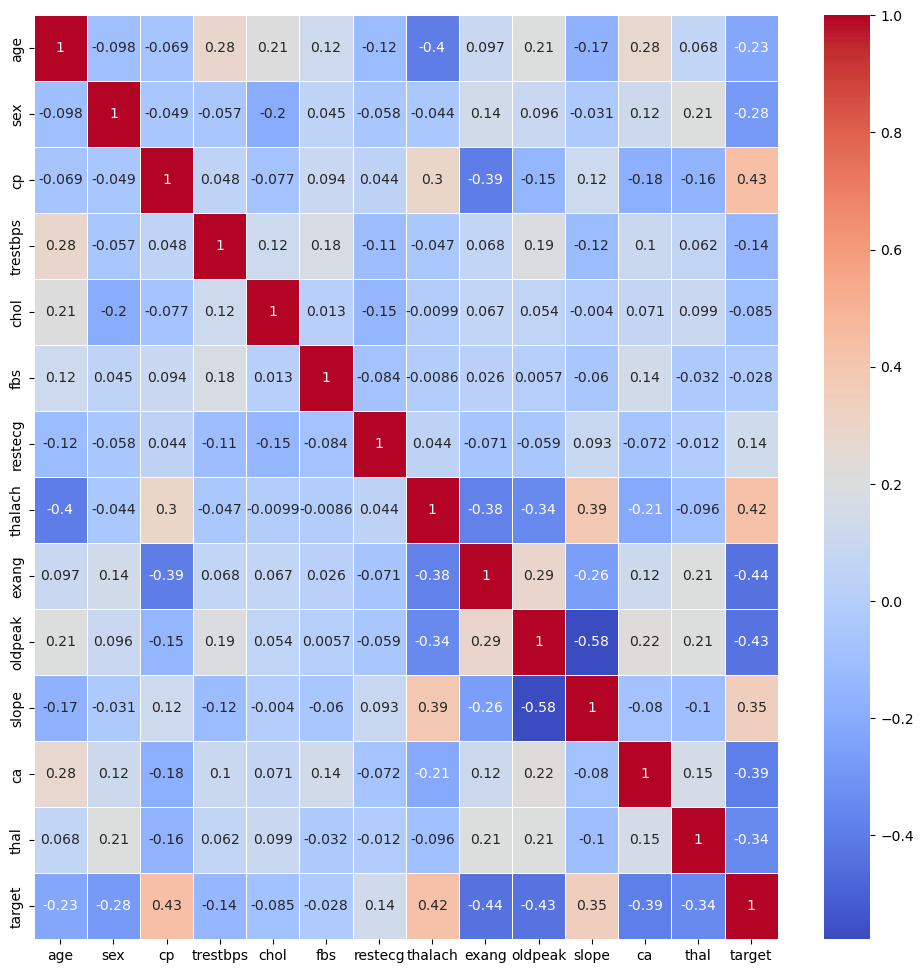

In [18]:
plt.figure(figsize=(12, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Key Findings from graph

cp (chest pain type) has a positive correlation with target (0.433), suggesting that higher values of cp may be associated with the presence of heart disease.

thalach (maximum heart rate achieved) also has a significant positive correlation with target (0.422), meaning higher heart rates could be associated with a higher chance of heart disease.

exang (exercise-induced angina) and oldpeak (ST depression) have negative correlations with target (-0.437 and -0.431 respectively), implying that higher values of these features may indicate a lower chance of heart disease.

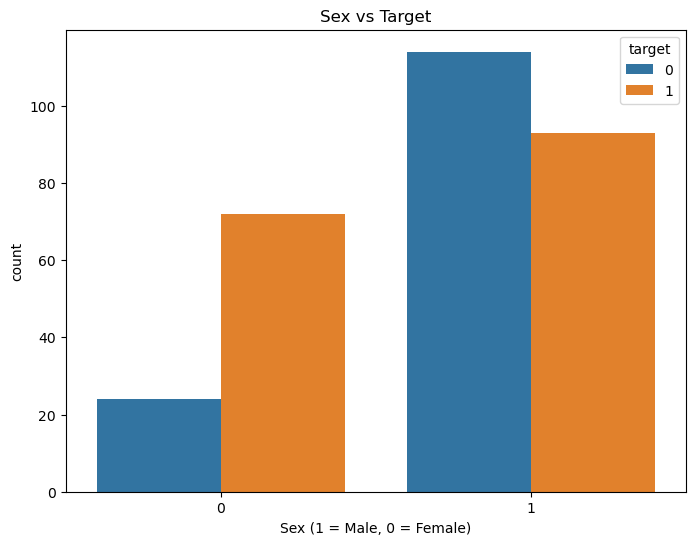

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=heart_data)
plt.title('Sex vs Target')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.show()

According to dataset analysis from above graph we can say that 

Females have a higher proportion of heart disease cases (target = 1) compared to those without heart disease.

Males have a larger count of cases without heart disease (target = 0) than with it, though many still have heart disease.

# Making Model 

In [13]:
# checking the distribution of target variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Target values, 

1 = diagnosed with Heart disease,   
0 = healthy heart

Splitting Features and target

In [15]:
x = heart_data.drop(columns='target',axis=1);
y = heart_data['target']

In [17]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Splitting data into training data and testing data

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [22]:
print(x.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Model training

In [23]:
model = LogisticRegression()

In [24]:
# Train the L-R Model with trein data
model.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy score

In [25]:
# Accuracy on training data

X_train_prediction = model.predict(X_train)
taining_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("Accuracy on training data : ",taining_data_accuracy);

Accuracy on training data :  0.8512396694214877


In [26]:
# Accuracy on testing data

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy on testing data : ",testing_data_accuracy);

Accuracy on testing data :  0.819672131147541


Building a predictive system

In [31]:
input_data = (62,0,0,160,164,0,0,145,0,6.2,0,3,3)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if(prediction==0) :
    print('The person does not have Heart Disease')
else :
    print('The person has Heart Disease')

The person does not have Heart Disease


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Saving the trained model

In [33]:
import pickle

In [34]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [36]:
#loading saved model

loaded_model = pickle.load(open('trained_model.sav','rb'))

In [37]:
input_data = (62,0,0,160,164,0,0,145,0,6.2,0,3,3)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

if(prediction==0) :
    print('The person does not have Heart Disease')
else :
    print('The person has Heart Disease')

The person does not have Heart Disease


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
